In [12]:
import traffic
import pandas as pd 
import os
from traffic.core import Traffic
from biblio_herramienta.herramienta import *
from biblio_herramienta.tratardatos import *

In [4]:
carpetaDatos = r'datos_sectores/' # carpeta que contiene los datos
nombreDatos = "datos_filtrados_def.csv" 

vuelos = cargardatos(carpetaDatos,nombreDatos)
vuelos

,,count
icao24,callsign,
4ca60f,IBK5BV,4034
4cace5,IBK6054,3266
344495,GES381L,3216
49514c,TAP434M,3065
4cace5,IBK6055,2689
345645,VLG3981,2478
48520d,TRA845,2193
4ca25a,RYR5VC,2183
3c56f7,EWG4TP,2171


## Cluster
Se va a intentar clasificar las trayectorias en función de su rumbo. Para eso se va utilziar el método enseñado en traffic

In [5]:
vuelos_un = vuelos.assign_id().unwrap().eval(max_workers=4)
vuelos_un.data.head()

,Unnamed: 0,Unnamed: 0.1,alert,altitude,callsign,geoaltitude,groundspeed,hour,icao24,last_position,latitude,longitude,onground,spi,squawk,timestamp,track,vertical_rate,flight_id,track_unwrapped
0,770597,22233,False,37000.0,TVF55YN,37375.0,417.0,2019-02-06 07:00:00+00:00,3964f9,2019-02-06 07:58:34.756000+00:00,43.125412,-2.166351,False,False,7673.0,2019-02-06 07:58:35+00:00,232.800188,0.0,TVF55YN_330,232.800188
1,770622,22234,False,37000.0,TVF55YN,37375.0,417.0,2019-02-06 07:00:00+00:00,3964f9,2019-02-06 07:58:35.769999872+00:00,43.124131,-2.168688,False,False,7673.0,2019-02-06 07:58:36+00:00,232.800188,0.0,TVF55YN_330,232.800188
2,770628,22235,False,37000.0,TVF55YN,37375.0,417.0,2019-02-06 07:00:00+00:00,3964f9,2019-02-06 07:58:36.954999808+00:00,43.122734,-2.171173,False,False,7673.0,2019-02-06 07:58:37+00:00,232.800188,0.0,TVF55YN_330,232.800188
3,770655,22236,False,37000.0,TVF55YN,37400.0,417.0,2019-02-06 07:00:00+00:00,3964f9,2019-02-06 07:58:37.851000064+00:00,43.121658,-2.173057,False,False,7673.0,2019-02-06 07:58:38+00:00,232.800188,0.0,TVF55YN_330,232.800188
4,770659,22237,False,37000.0,TVF55YN,37400.0,417.0,2019-02-06 07:00:00+00:00,3964f9,2019-02-06 07:58:38.888999936+00:00,43.120514,-2.175165,False,False,7673.0,2019-02-06 07:58:39+00:00,232.800188,0.0,TVF55YN_330,232.800188


## Aplicación del cluster sobre los datos
La siguiente celda tiene el método de cluster aplicado sobre las trayectorias, una vez computado se genera una columna dentro de los datos que señala el cluster al que pertenece cada trayectoria.
El algoritmo usado el es el DBSCAN

## 1. DBSCAN

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from traffic.core.projection import CH1903

# la funcion permite aplicar algoritmos de ML a los datos que tenemos
vuelos_dbscan = vuelos_un.clustering(
    nb_samples=15, # divide en 15 puntos las trayecorias
    features=["longitude", "latitude", "track_unwrapped"], # datos cebados al algorimto de ML
    clustering=DBSCAN(eps=0.5, min_samples=10), # algoritmo de ML utilizado, con los parámetros del mismo
    transform=StandardScaler(), # lo que hace esto es escalar los datos dentro de una distribuciñ¡ón Gausiana
).fit_predict()


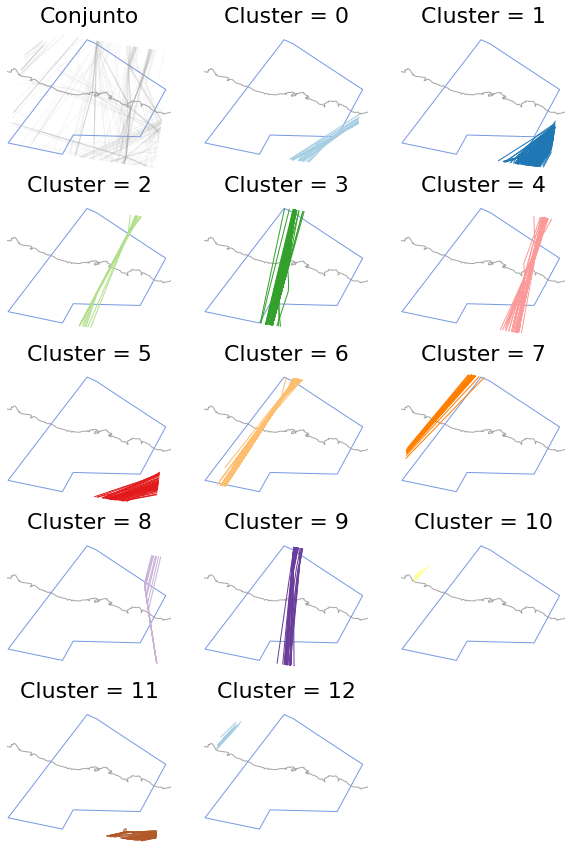

In [13]:
representarcluster(vuelos_dbscan,"cluster_dbscan.png","imagenes_cluster/")

## 2. Optics

In [8]:
from sklearn.cluster import OPTICS
vuelos_optics = vuelos_un.clustering(
    nb_samples = 15,
    features=["longitude", "latitude", "track_unwrapped"],
    transform = StandardScaler(),
    clustering = OPTICS(min_samples=20, eps = 0.5)
).fit_predict()

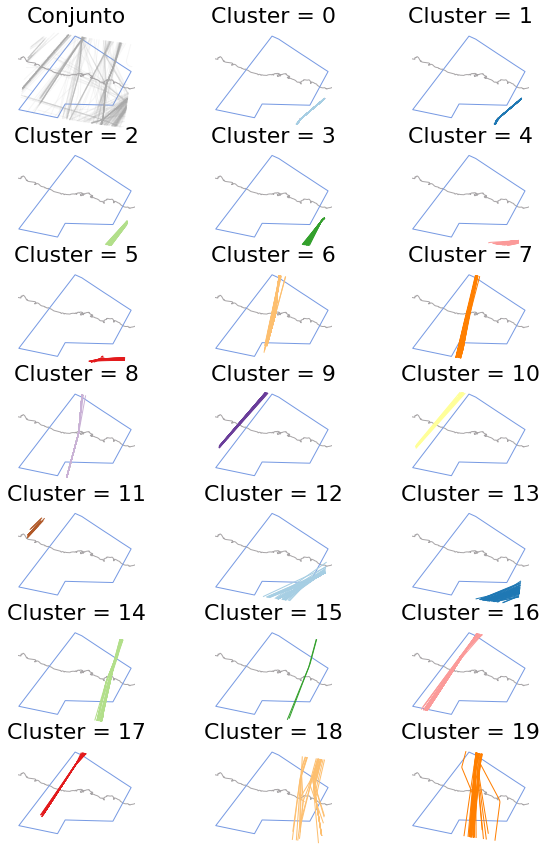

In [9]:
representarcluster(vuelos_optics,"cluster_optics.png","imagenes_cluster/")

Hay que tener cuidado con los parametros de este algoritmo, sino se pone bien puede generar mas de 60 clusters 

## 3. K-medias

In [10]:
from sklearn.cluster import KMeans
vuelos_kmeans = vuelos_un.clustering(
    nb_samples=15, # divide en 15 puntos las trayecorias
    features=["longitude", "latitude", "track_unwrapped"], # datos cebados al algorimto de ML
    clustering=KMeans(
                     n_clusters = 14,
                     n_init = 10,
                     random_state = 7), # algoritmo de ML utilizado, con los parámetros del mismo
    transform=StandardScaler(), # lo que hace esto es escalar los datos dentro de una distribuciñ¡ón Gausiana
).fit_predict()

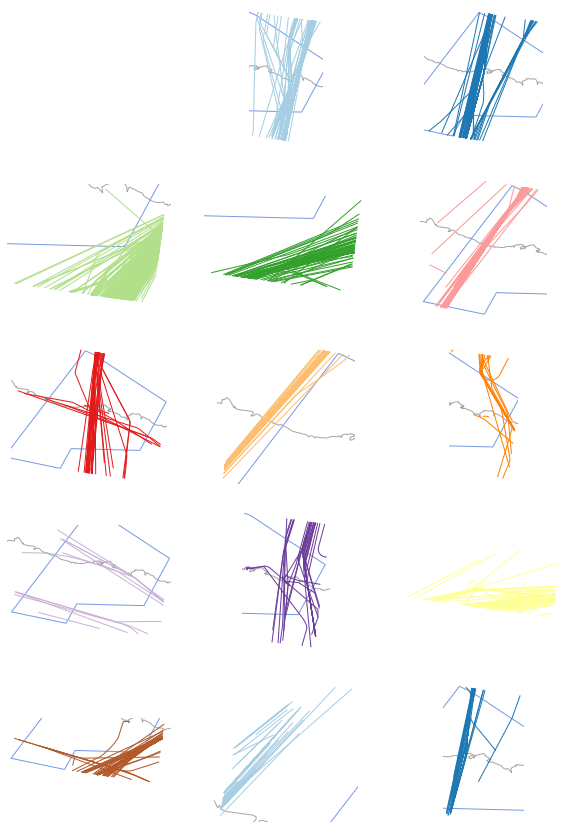

In [11]:
representarcluster(vuelos_kmeans,"cluster_kmeans.png",True)